# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

In [8]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "Metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f"{url}units={units}&q={city}&appid={weather_api_key}"  

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
      
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds =city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
     
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | barkhan
Processing Record 3 of Set 1 | nikolayevsk-on-amure
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | hithadhoo
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | pisco
Processing Record 8 of Set 1 | wanning
Processing Record 9 of Set 1 | wanxian
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | klaksvik
Processing Record 12 of Set 1 | goba
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | badger
Processing Record 15 of Set 1 | shofirkon shahri
City not found. Skipping...
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | fale old settlement
Processing Record 19 of Set 1 | atafu village
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
Processing Record 21 of Set 1 | b

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,0.85,93,100,1.03,CA,1749178894
1,barkhan,29.8977,69.5256,29.14,30,0,0.49,PK,1749179067
2,nikolayevsk-on-amure,53.1406,140.7300,3.50,100,100,1.94,RU,1749179068
3,port-aux-francais,-49.3500,70.2167,1.53,61,100,13.62,TF,1749179069
4,hithadhoo,-0.6000,73.0833,29.17,70,98,3.97,MV,1749178910


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,0.85,93,100,1.03,CA,1749178894
1,barkhan,29.8977,69.5256,29.14,30,0,0.49,PK,1749179067
2,nikolayevsk-on-amure,53.1406,140.7300,3.50,100,100,1.94,RU,1749179068
3,port-aux-francais,-49.3500,70.2167,1.53,61,100,13.62,TF,1749179069
4,hithadhoo,-0.6000,73.0833,29.17,70,98,3.97,MV,1749178910


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

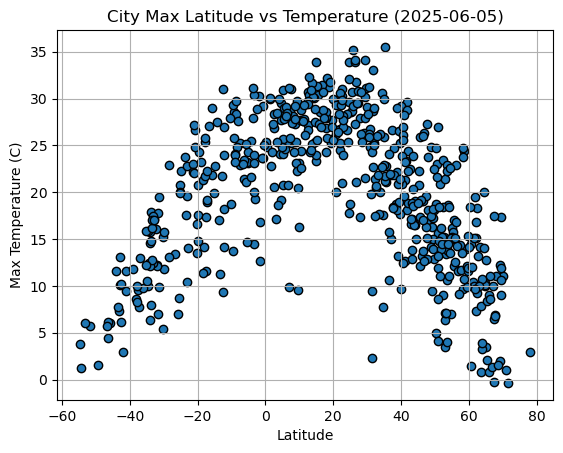

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor='black',  marker="o")

# Incorporate the other graph properties 
plt.title("City Max Latitude vs Temperature (2025-06-05)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

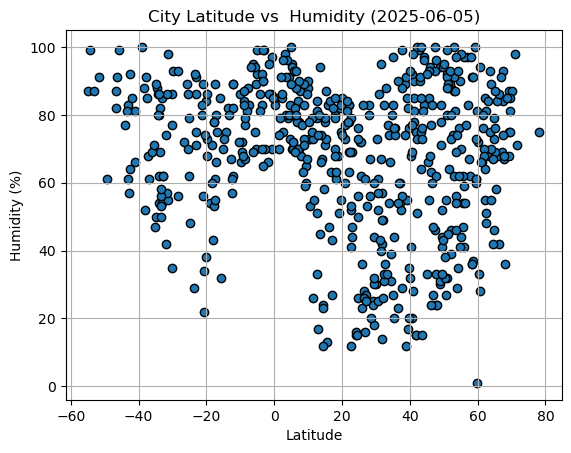

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor='black', marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs  Humidity (2025-06-05)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

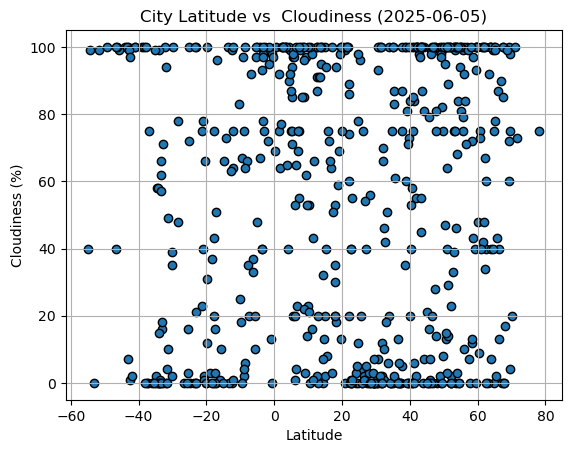

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor='black', marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs  Cloudiness (2025-06-05)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

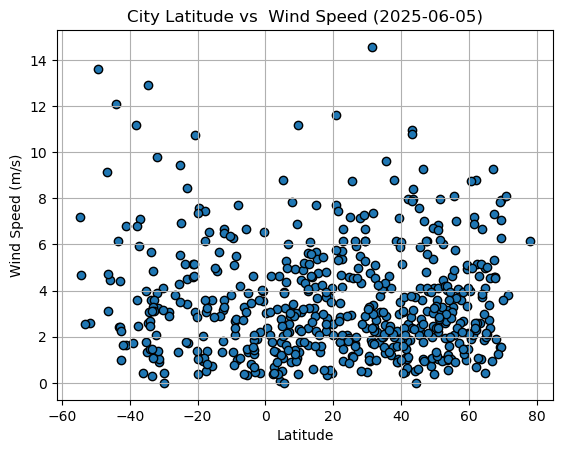

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor='black', marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs  Wind Speed (2025-06-05)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    
    # Creates a scatter plot with linear regression line and shows the R-squared value.
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    r_squared = f"R² = {r_value**2:.3f}"

    plt.figure(figsize=(8, 6))
    plt.scatter(x_values, y_values, edgecolor="black", alpha=0.7)
    plt.plot(x_values, regress_values, color="red", linewidth=2)
    
    # Show line equation and R-squared on the plot
    plt.annotate(line_eq, (x_values.min(), y_values.max()*0.95), fontsize=12, color="red")
    plt.annotate(r_squared, (x_values.min(), y_values.max()*0.85), fontsize=12, color="red")
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.tight_layout()
    plt.show()
    

In [48]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,0.85,93,100,1.03,CA,1749178894
1,barkhan,29.8977,69.5256,29.14,30,0,0.49,PK,1749179067
2,nikolayevsk-on-amure,53.1406,140.7300,3.50,100,100,1.94,RU,1749179068
5,tiksi,71.6872,128.8694,-0.36,71,73,3.79,RU,1749179071
7,wanning,18.8003,110.3967,31.22,68,59,3.74,CN,1749179074


In [50]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,port-aux-francais,-49.3500,70.2167,1.53,61,100,13.62,TF,1749179069
4,hithadhoo,-0.6000,73.0833,29.17,70,98,3.97,MV,1749178910
6,pisco,-13.7000,-76.2167,17.03,82,100,5.66,PE,1749179072
14,ushuaia,-54.8000,-68.3000,3.81,87,40,7.20,AR,1749179083
15,blackmans bay,-43.0167,147.3167,10.07,61,100,4.41,AU,1749179084


###  Temperature vs. Latitude Linear Regression Plot

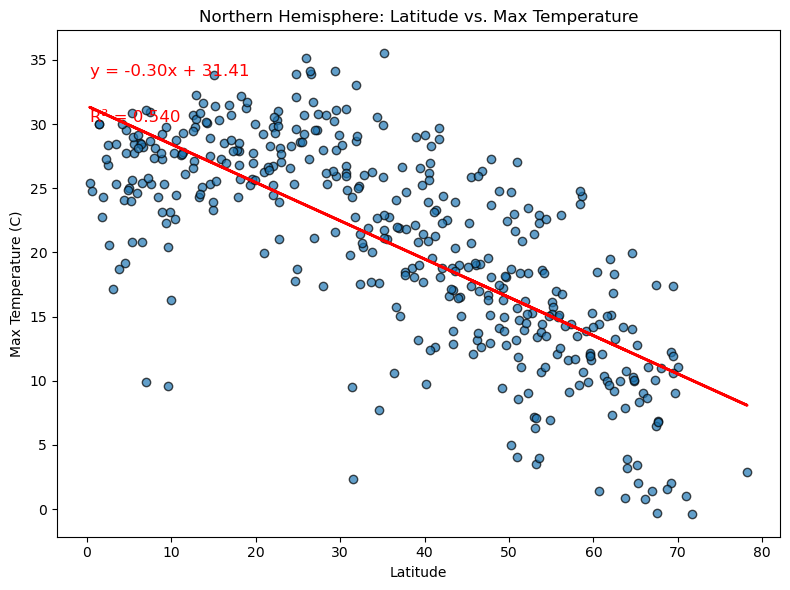

In [53]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Max Temp"],
                       "Latitude",
                       "Max Temperature (C)",
                       "Northern Hemisphere: Latitude vs. Max Temperature")

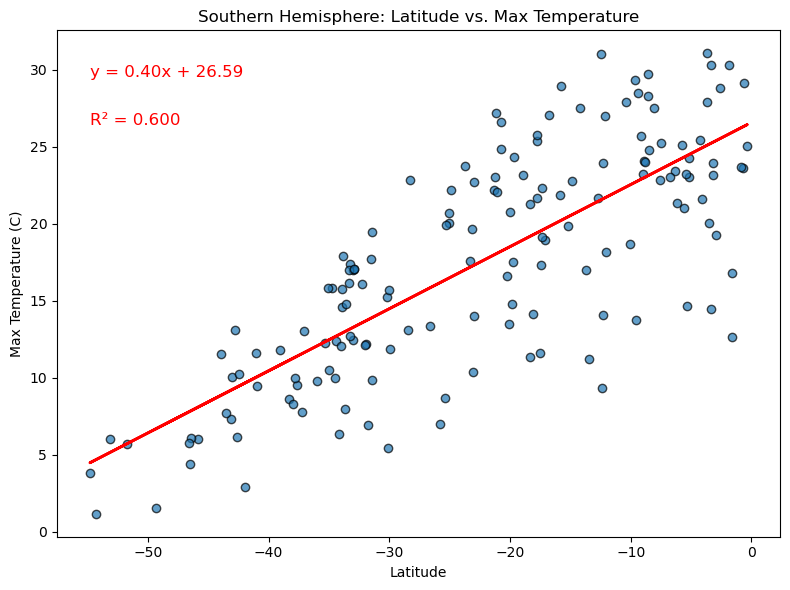

In [55]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Max Temp"],
                       "Latitude",
                       "Max Temperature (C)",
                       "Southern Hemisphere: Latitude vs. Max Temperature")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

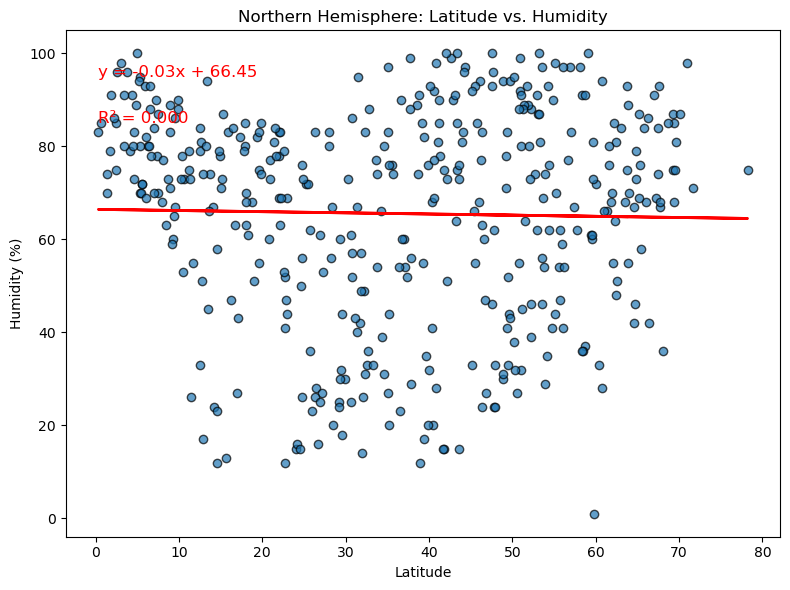

In [57]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Humidity"],
                       "Latitude",
                       "Humidity (%)",
                       "Northern Hemisphere: Latitude vs. Humidity")

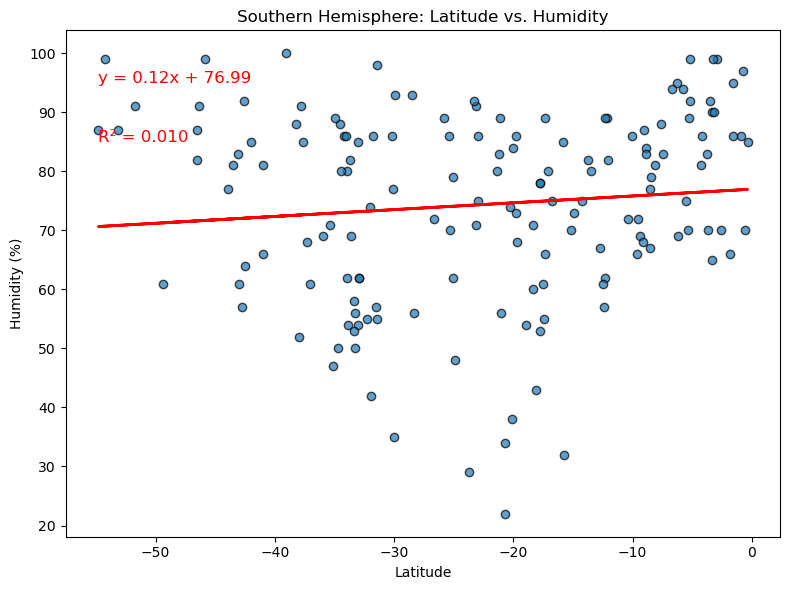

In [59]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Humidity"],
                       "Latitude",
                       "Humidity (%)",
                       "Southern Hemisphere: Latitude vs. Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

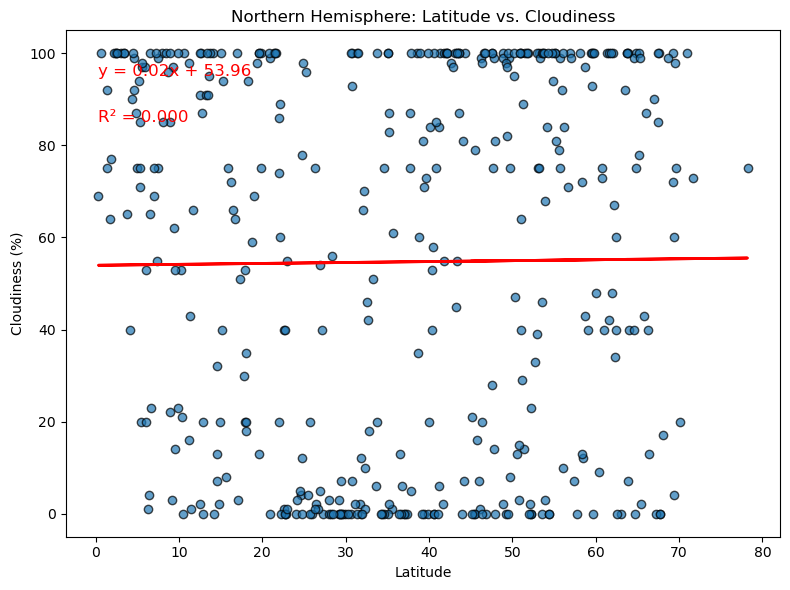

In [61]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Cloudiness"],
                       "Latitude",
                       "Cloudiness (%)",
                       "Northern Hemisphere: Latitude vs. Cloudiness")

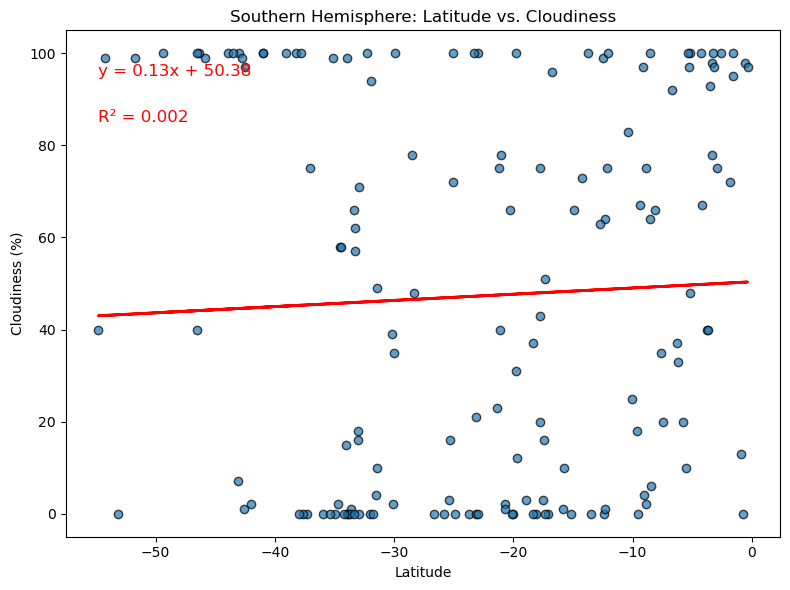

In [63]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Cloudiness"],
                       "Latitude",
                       "Cloudiness (%)",
                       "Southern Hemisphere: Latitude vs. Cloudiness")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

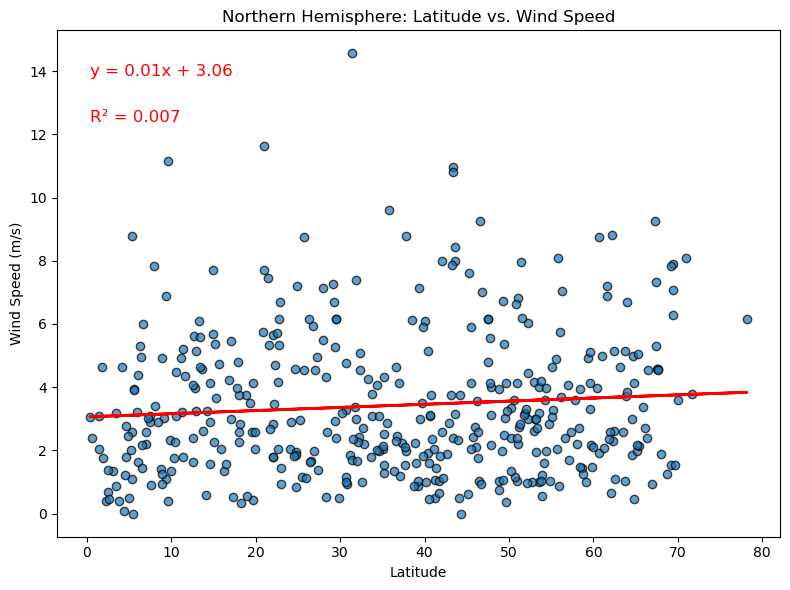

In [65]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Wind Speed"],
                       "Latitude",
                       "Wind Speed (m/s)",
                       "Northern Hemisphere: Latitude vs. Wind Speed")

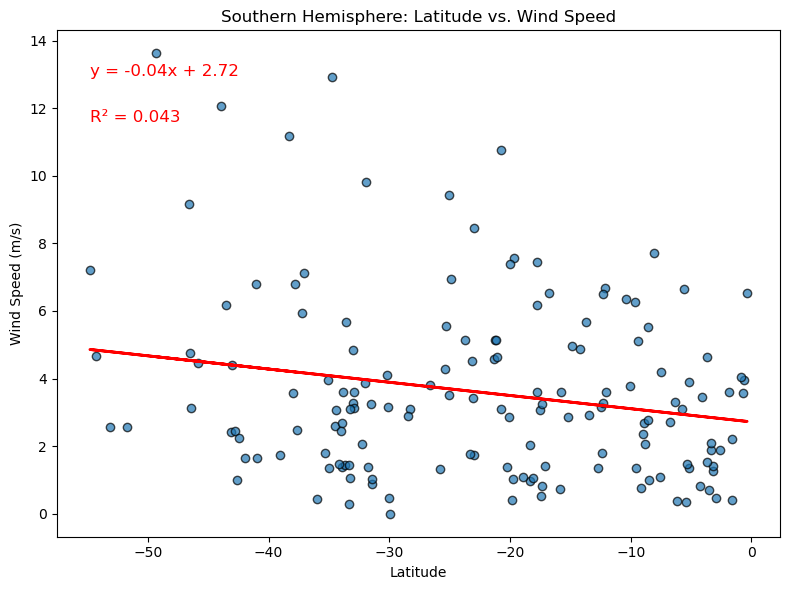

In [67]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Wind Speed"],
                       "Latitude",
                       "Wind Speed (m/s)",
                       "Southern Hemisphere: Latitude vs. Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE